In [ ]:
pip install mpi4py

     |████████████████████████████████| 2.5 MB 27.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for mpi4py: filename=mpi4py-3.1.3-cp37-cp37m-linux_x86_64.whl size=2185295 sha256=a71baf9ab534ed50e8529bc220541f77dd851d058e301d9be1e0dd7df3ea7f00
  Stored in directory: /root/.cache/pip/wheels/7a/07/14/6a0c63fa2c6e473c6edc40985b7d89f05c61ff25ee7f0ad9ac
Successfully built mpi4py


MPI (Message Passing Interface, Интерфейс передачи сообщений) - является спецификацией обмена сообщениями. Самая первейшая цель MPI состоит в установлении некого действенного, гибкого и переносимого стандарта взаимодействия обмена сообщениями.

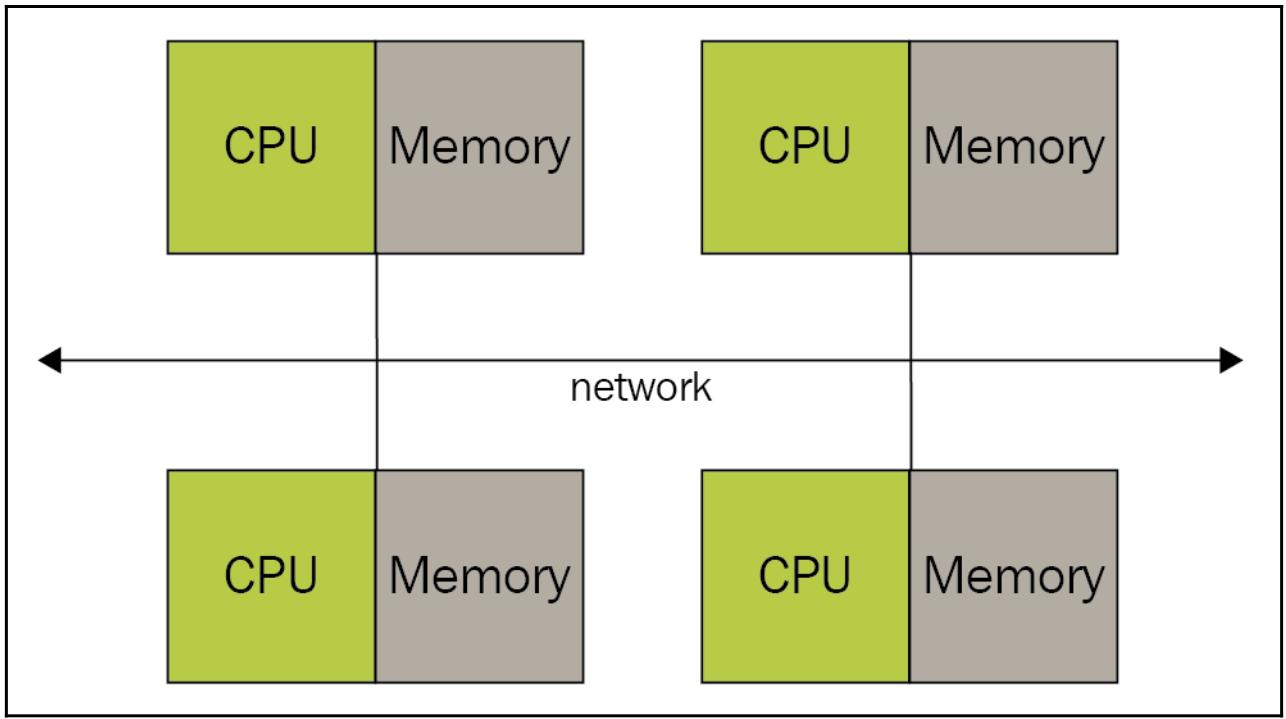

In [ ]:
from PIL import Image
import requests
import IPython
from urllib.request import urlopen
IPython.display.Image("http://onreader.mdl.ru/PythonParallelProgrammingCookbook.2nd/content/figures/Fig0401.jpg", width = 500)

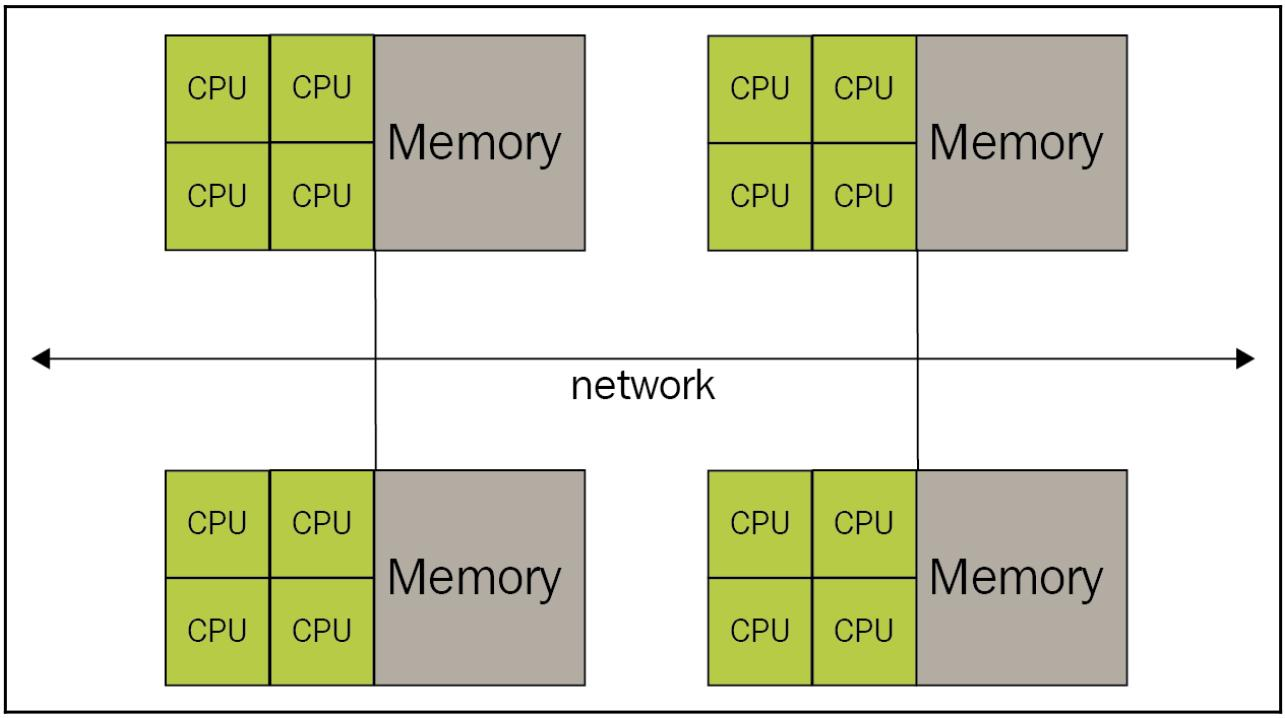

In [ ]:
from PIL import Image
import requests
import IPython
from urllib.request import urlopen
IPython.display.Image("http://onreader.mdl.ru/PythonParallelProgrammingCookbook.2nd/content/figures/Fig0402.jpg", width = 500)

- стандартизация
- переносимость
- производительность
- функциональность


- точка-точка
- коллективные взаимодействия
- топологии

In [ ]:
from mpi4py import MPI
coms = MPI.COMM_WORLD
rank = coms.Get_rank()
print("*", coms)
print("Hello world from process", rank)

* <mpi4py.MPI.Intracomm object at 0x7ff5831da6f0>
Hello world from process 0


In [ ]:
from mpi4py import MPI

In [ ]:
!bash

bash: cannot set terminal process group (70): Inappropriate ioctl for device
bash: no job control in this shell
/content# mpiexec -n 4 python script.py
--------------------------------------------------------------------------
mpiexec has detected an attempt to run as root.
Running at root is *strongly* discouraged as any mistake (e.g., in
defining TMPDIR) or bug can result in catastrophic damage to the OS
file system, leaving your system in an unusable state.

You can override this protection by adding the --allow-run-as-root
option to your cmd line. However, we reiterate our strong advice
against doing so - please do so at your own risk.
--------------------------------------------------------------------------
/content# 
/content# 
/content# 
/content# exit


In [ ]:
import subprocess
subprocess.call(['mpiexec', '-n', '5', 'python', '/bin/helloworld.py'])

1

Hello world from process 1

Hello world from process 2

Hello world from process 0

Hello world from process 3

SPMD - Single programm multiple data

Реализация точка-точка

In [ ]:
from mpi4py import MPI

comm = MPI.COMM_WORLD
rank = comm.rank
print("my rank ", rank)
data = -1
destination_process = -1
if (rank == 0):
  data = 100000
  destination_process = 4
  comm.send(data, destination_process)
if (rank == 4):
  data = comm.recv(source = 0) + 1
  print("data ", data)

In [ ]:
mpiexec -n 5 python /bin/helloworld.py

my rank 2

my rank 1

my rank 0

my rank 3

my rank 4

data 100001

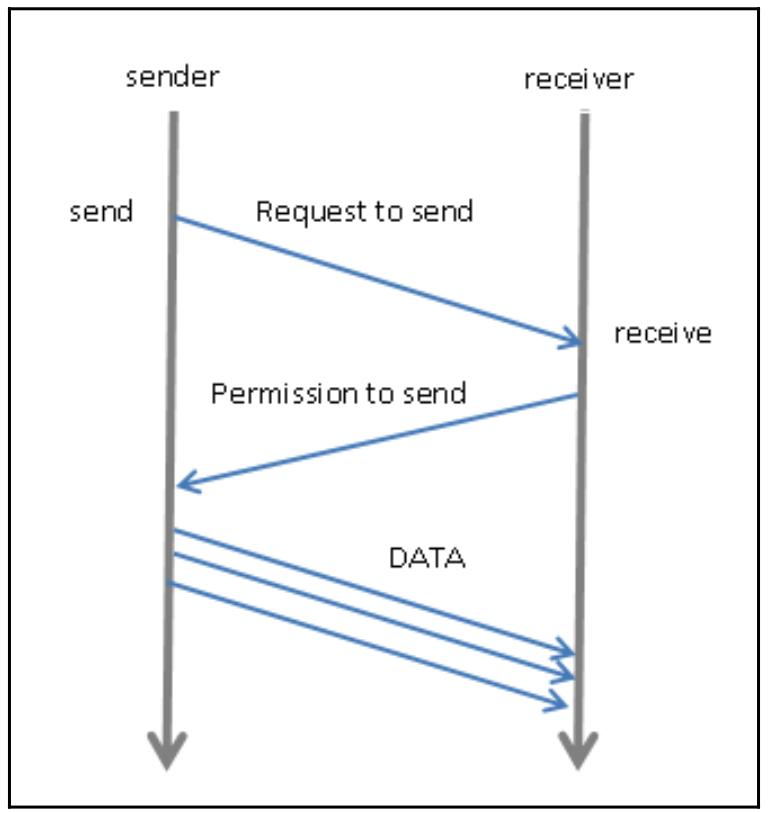

In [ ]:
from PIL import Image
import requests
import IPython
from urllib.request import urlopen
IPython.display.Image("http://onreader.mdl.ru/PythonParallelProgrammingCookbook.2nd/content/figures/Fig0403.jpg", width = 500)

In [ ]:
from mpi4py import MPI

comm = MPI.COMM_WORLD
rank = comm.rank
print("my rank ", rank)
data = -1
destination_process = -1
if (rank == 1):
  data = 200000
  destination_process = 5
  comm.send(data, destination_process)
  data = comm.recv(destination_process)
  print("data ", data)
if (rank == 5):
  data = comm.recv(source = 1) + 1
  destination_process = 1
  data = comm.recv(destination_process)
  comm.send(data, destination_process)
  print("data ", data)

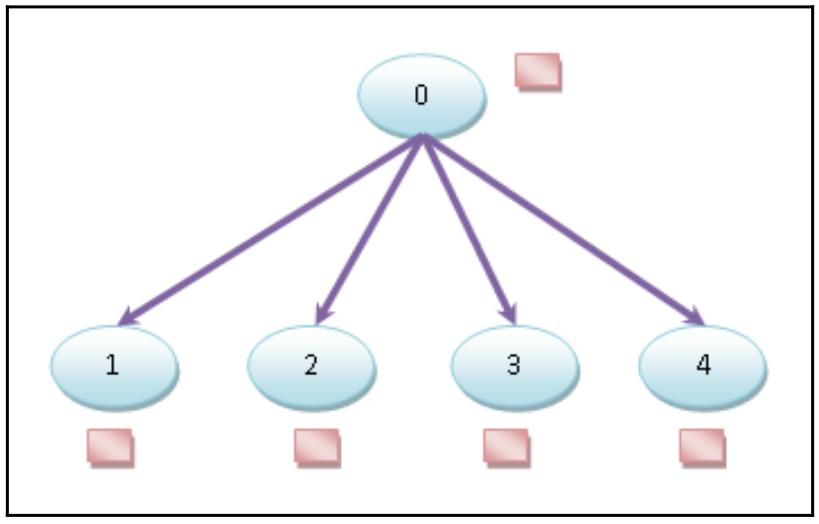

In [ ]:
from PIL import Image
import requests
import IPython
from urllib.request import urlopen
IPython.display.Image("http://onreader.mdl.ru/PythonParallelProgrammingCookbook.2nd/content/figures/Fig0404.jpg", width = 500)

In [ ]:
# buf = comm.bcast(data, rank)

In [ ]:
from mpi4py import MPI
comm = MPI.COMM_WORLD
rank = comm.Get_rank()

if (rank == 0):
  data = 100
else:
  data -1

data = comm.bcast(data, root = 0)
print("process ", rank, data)

process 0 100

process 5 100

process 7 100

...

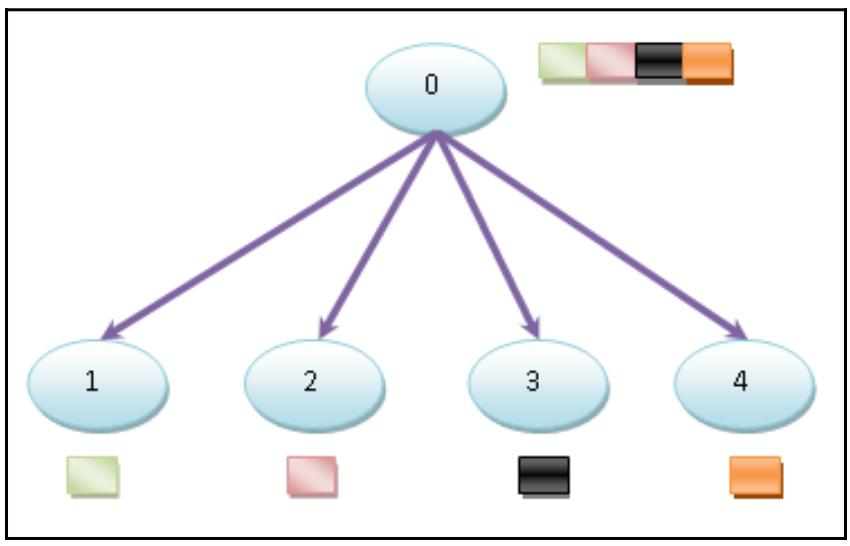

In [ ]:
from PIL import Image
import requests
import IPython
from urllib.request import urlopen
IPython.display.Image("http://onreader.mdl.ru/PythonParallelProgrammingCookbook.2nd/content/figures/Fig0405.jpg", width = 500)

In [ ]:
from mpi4py import MPI
comm = MPI.COMM_WORLD
rank = comm.Get_rank()

if (rank == 0):
  data = [1, 2, 3, 4, 5]
else:
  data = None

recvbuf = comm.scatter(data, root = 0)
print("process ", rank, data)

mpiexec -n 5 python /bin/helloworld.py


process 0 1

process 3 4

process 2 3

...

<img src="http://onreader.mdl.ru/PythonParallelProgrammingCookbook.2nd/content/figures/Fig0406.jpg" width="500px" />

In [ ]:
from PIL import Image
import requests
import IPython
from urllib.request import urlopen
IPython.display.Image("http://onreader.mdl.ru/PythonParallelProgrammingCookbook.2nd/content/figures/Fig0406.jpg", width = 500)

In [ ]:
from mpi4py import MPI
comm = MPI.COMM_WORLD
size = comm.Get_size()
rank = comm.Get_rank()
data = None
if (rank == 0):
  print(rank)
  for i in range(1, size):
    value = data[i]
    print(rank, value)
else:
  data = (rank + 1)**2

data = comm.gather(data, root = 0)
print("process ", rank, data)

0
process  0 [None]


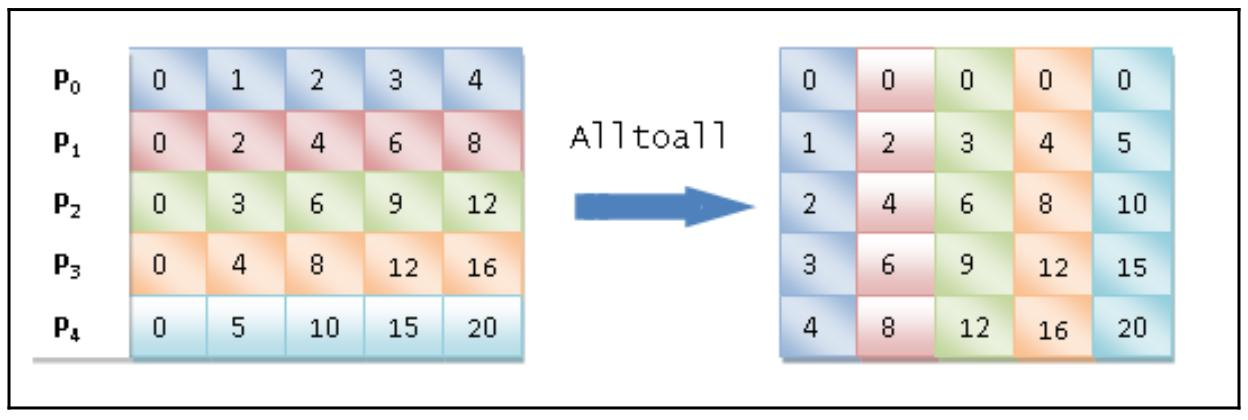

In [ ]:
from PIL import Image
import requests
import IPython
from urllib.request import urlopen
IPython.display.Image("http://onreader.mdl.ru/PythonParallelProgrammingCookbook.2nd/content/figures/Fig0407.jpg", width = 500)

In [ ]:
from mpi4py import MPI
import numpy
comm = MPI.COMM_WORLD
size = comm.Get_size()
rank = comm.Get_rank()
senddata = (rank + 1)*numpy.arange(size, dtype = int)
recvdata = numpy.empty(size, dtype = int)
comm.Alltoall(senddata, recvdata)

In [ ]:
# comm.reduce

In [ ]:
# comm.Reduce(sendbuf, recvbuf, root_process, op = type)

In [ ]:
import numpy
from mpi4py import MPI
comm = MPI.COMM_WORLD
size = comm.Get_size()
rank = comm.Get_rank()
array_size = 10
recvdata = numpy.zeros(size, dtype = int)
senddata = (rank + 1)*numpy.arange(size, dtype = int)
comm.Reduce(senddata, recvdata, op = MPI.SUM)

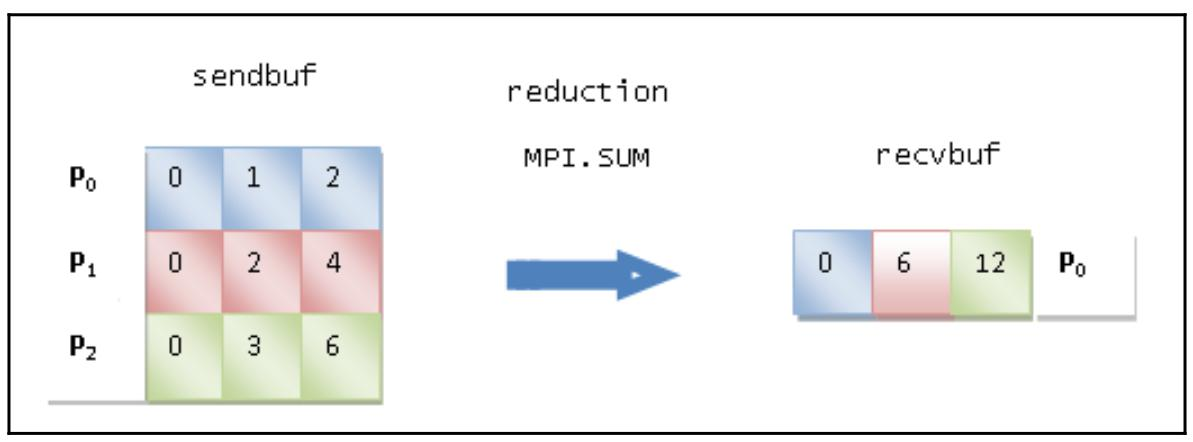

In [ ]:
from PIL import Image
import requests
import IPython
from urllib.request import urlopen
IPython.display.Image("http://onreader.mdl.ru/PythonParallelProgrammingCookbook.2nd/content/figures/Fig0408.jpg", width = 500)

MPI MAX

MPI MIN

MPI SUM

MPI PROD

MPI LAND